In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json
from scipy import stats
from scipy import stats
from datetime import datetime
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


In [2]:
# Loading Campaign Data

with open (r"C:\Users\Ritesh Reddy\OneDrive\Desktop\campaign\campaign.json") as f:
    data_1=json.load(f)

In [3]:
# Loading Behaviour Data

with open (r"C:\Users\Ritesh Reddy\OneDrive\Desktop\behaviour\behaviour.json") as f:
    data=json.load(f)

In [4]:
formatted_data = []
for item in data_1:
    for key, value in item.items():
        value['CustomerID'] = key  
        formatted_data.append(value)


campaign = pd.DataFrame(formatted_data)


campaign = campaign[['CustomerID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']]

In [5]:
formatted_data_1 = []
for item in data:
    for key, value in item.items():
        value['CustomerID'] = key 
        formatted_data_1.append(value)


behaviour = pd.DataFrame(formatted_data_1)


behaviour = behaviour[['CustomerID', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

In [6]:
# Converting Campaign Data into DataFrame

campaign=pd.DataFrame(campaign)

In [7]:
# Converting Behaviour Data into DataFrame

behaviour = pd.DataFrame(behaviour)

In [8]:
campaign.head()

,CustomerID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,ID_1826,0,0,0,0,0,1,0
1,ID_1,0,1,0,0,0,1,0
2,ID_10476,0,0,0,0,0,0,0
3,ID_1386,0,0,0,0,0,0,0
4,ID_5371,0,0,1,0,0,1,0


In [9]:
behaviour.head()

,CustomerID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,ID_1826,0,189,104,379,111,189,218,1,4,4,6,1
1,ID_1,0,464,5,64,7,0,37,1,7,3,7,5
2,ID_10476,0,134,11,59,15,2,30,1,3,2,5,2
3,ID_1386,0,10,0,1,0,0,0,1,1,0,2,7
4,ID_5371,0,6,16,24,11,0,34,2,3,1,2,7


--------------------------------------------------------------------------------------------------------------------------------

In [10]:
# Loading Demographics Data

demographics=pd.read_csv(r"C:\Users\Ritesh Reddy\OneDrive\Desktop\Retail_Sales_ABADS\demographics.txt",delimiter="\t")

In [11]:
demographics.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP


In [12]:
demographics['CustomerID']=demographics['ID']

In [13]:
demographics.drop(columns=['ID'], inplace=True)

In [14]:
demographics['Customer_Inseption_Date'] = pd.to_datetime(demographics['Dt_Customer'], format='mixed')

In [15]:
demographics.drop(columns=['Dt_Customer'], inplace=True)

In [16]:
# Null Values Treatment 

demographics=demographics.dropna()
demographics.isnull().sum()

Year_Birth                 0
Education                  0
Marital_Status             0
 Income                    0
Kidhome                    0
Teenhome                   0
Country                    0
CustomerID                 0
Customer_Inseption_Date    0
dtype: int64

In [17]:
demographics.columns = demographics.columns.str.strip()

In [18]:
demographics['Income'] = demographics['Income'].str.strip()

In [19]:
demographics.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Country', 'CustomerID', 'Customer_Inseption_Date'],
      dtype='object')

In [20]:
demographics['Income(in_$)'] = demographics['Income'].str.replace('$', '').str.replace(',','').astype(float)

In [21]:
demographics.drop(columns=['Income'], inplace=True)

--------------------------------------------------------------------------------------------------------------------------------

In [22]:
campaign_behaviour=pd.merge(campaign,behaviour,on='CustomerID')

In [23]:
campaign_behaviour.head()

,CustomerID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,ID_1826,0,0,0,0,0,1,0,0,189,104,379,111,189,218,1,4,4,6,1
1,ID_1,0,1,0,0,0,1,0,0,464,5,64,7,0,37,1,7,3,7,5
2,ID_10476,0,0,0,0,0,0,0,0,134,11,59,15,2,30,1,3,2,5,2
3,ID_1386,0,0,0,0,0,0,0,0,10,0,1,0,0,0,1,1,0,2,7
4,ID_5371,0,0,1,0,0,1,0,0,6,16,24,11,0,34,2,3,1,2,7


In [24]:
campaign_behaviour[["CustomerID","CustomerID"]]=campaign_behaviour['CustomerID'].str.split('_', expand=True)

In [25]:
campaign_behaviour["CustomerID"]=campaign_behaviour["CustomerID"].astype(int)

--------------------------------------------------------------------------------------------------------------------------------

In [26]:
# Merging three Data sets

w_data=pd.merge(campaign_behaviour,demographics,on='CustomerID')

In [27]:
w_data.head()

,CustomerID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Country,Customer_Inseption_Date,Income(in_$)
0,1826,0,0,0,0,0,1,0,0,189,...,6,1,1970,Graduation,Divorced,0,0,SP,2014-06-16,84835.0
1,1,0,1,0,0,0,1,0,0,464,...,7,5,1961,Graduation,Single,0,0,CA,2014-06-15,57091.0
2,10476,0,0,0,0,0,0,0,0,134,...,5,2,1958,Graduation,Married,0,1,US,2014-05-13,67267.0
3,1386,0,0,0,0,0,0,0,0,10,...,2,7,1967,Graduation,Together,1,1,AUS,2014-05-11,32474.0
4,5371,0,0,1,0,0,1,0,0,6,...,2,7,1989,Graduation,Single,1,0,SP,2014-04-08,21474.0


In [28]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CustomerID               2216 non-null   int32         
 1   AcceptedCmp1             2216 non-null   int64         
 2   AcceptedCmp2             2216 non-null   int64         
 3   AcceptedCmp3             2216 non-null   int64         
 4   AcceptedCmp4             2216 non-null   int64         
 5   AcceptedCmp5             2216 non-null   int64         
 6   Response                 2216 non-null   int64         
 7   Complain                 2216 non-null   int64         
 8   Recency                  2216 non-null   int64         
 9   MntWines                 2216 non-null   int64         
 10  MntFruits                2216 non-null   int64         
 11  MntMeatProducts          2216 non-null   int64         
 12  MntFishProducts          2216 non-

In [29]:
w_data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [30]:
w_data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [31]:
w_data['Country'].value_counts()

Country
SP     1093
SA      337
CA      266
AUS     147
IND     147
GER     116
US      107
ME        3
Name: count, dtype: int64

--------------------------------------------------------------------------------------------------------------------------------

In [32]:
# Separating Count Data and Catagorical Data 

count=w_data.select_dtypes(include=np.number)
cat=w_data.select_dtypes(include=object)

In [33]:
count.columns

Index(['CustomerID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Year_Birth', 'Kidhome', 'Teenhome',
       'Income(in_$)'],
      dtype='object')

In [34]:
cat.columns

Index(['Education', 'Marital_Status', 'Country'], dtype='object')

--------------------------------------------------------------------------------------------------------------------------------

In [35]:
w_data.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,2216.0,5588.353339,0.0,2814.75,5458.5,8421.75,11191.0,3249.376275
AcceptedCmp1,2216.0,0.064079,0.0,0.0,0.0,0.0,1.0,0.24495
AcceptedCmp2,2216.0,0.013538,0.0,0.0,0.0,0.0,1.0,0.115588
AcceptedCmp3,2216.0,0.073556,0.0,0.0,0.0,0.0,1.0,0.261106
AcceptedCmp4,2216.0,0.074007,0.0,0.0,0.0,0.0,1.0,0.261842
AcceptedCmp5,2216.0,0.073105,0.0,0.0,0.0,0.0,1.0,0.260367
Response,2216.0,0.150271,0.0,0.0,0.0,0.0,1.0,0.357417
Complain,2216.0,0.009477,0.0,0.0,0.0,0.0,1.0,0.096907
Recency,2216.0,49.012635,0.0,24.0,49.0,74.0,99.0,28.948352
MntWines,2216.0,305.091606,0.0,24.0,174.5,505.0,1493.0,337.32792


In [36]:
count.corr()

,CustomerID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year_Birth,Kidhome,Teenhome,Income(in_$)
CustomerID,1.000000,-0.018219,-0.014994,-0.035890,-0.023933,-0.007064,-0.021491,0.034154,-0.044376,-0.021084,...,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,0.002355,0.001736,-0.003030,0.013095
AcceptedCmp1,-0.018219,1.000000,0.176637,0.095683,0.242782,0.407878,0.297345,-0.025594,-0.021061,0.351417,...,0.170132,-0.127374,0.159292,0.309026,0.178743,-0.194773,-0.009611,-0.174163,-0.144855,0.276820
AcceptedCmp2,-0.014994,0.176637,1.000000,0.071702,0.295050,0.222121,0.169294,-0.011459,-0.001400,0.206185,...,0.050734,-0.037981,0.034829,0.099915,0.085271,-0.007362,-0.006717,-0.081868,-0.015521,0.087545
AcceptedCmp3,-0.035890,0.095683,0.071702,1.000000,-0.079659,0.080248,0.254005,0.008124,-0.032257,0.061463,...,0.124958,-0.023135,0.042958,0.104345,-0.068913,0.061307,0.061784,0.016066,-0.042522,-0.016174
AcceptedCmp4,-0.023933,0.242782,0.295050,-0.079659,1.000000,0.311314,0.180205,-0.027652,0.017566,0.373143,...,0.024015,0.016077,0.162932,0.140182,0.178020,-0.028666,-0.066109,-0.162026,0.038376,0.184400
AcceptedCmp5,-0.007064,0.407878,0.222121,0.080248,0.311314,1.000000,0.323374,-0.009576,-0.000482,0.473550,...,0.181397,-0.184253,0.141189,0.322471,0.212954,-0.277883,0.010575,-0.205305,-0.190791,0.335943
Response,-0.021491,0.297345,0.169294,0.254005,0.180205,0.323374,1.000000,-0.002029,-0.199766,0.246299,...,0.140332,0.003451,0.151431,0.219914,0.036241,-0.002209,0.023692,-0.077909,-0.153901,0.133047
Complain,0.034154,-0.025594,-0.011459,0.008124,-0.027652,-0.009576,-0.002029,1.000000,0.013637,-0.039470,...,-0.031133,0.000497,-0.016642,-0.020839,-0.016941,0.019785,-0.030407,0.040978,0.003307,-0.027225
Recency,-0.044376,-0.021061,-0.001400,-0.032257,0.017566,-0.000482,-0.199766,0.013637,1.000000,0.015721,...,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.016295,0.011492,0.013838,-0.003970
MntWines,-0.021084,0.351417,0.206185,0.061463,0.373143,0.473550,0.246299,-0.039470,0.015721,1.000000,...,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,-0.159451,-0.497336,0.003747,0.578650


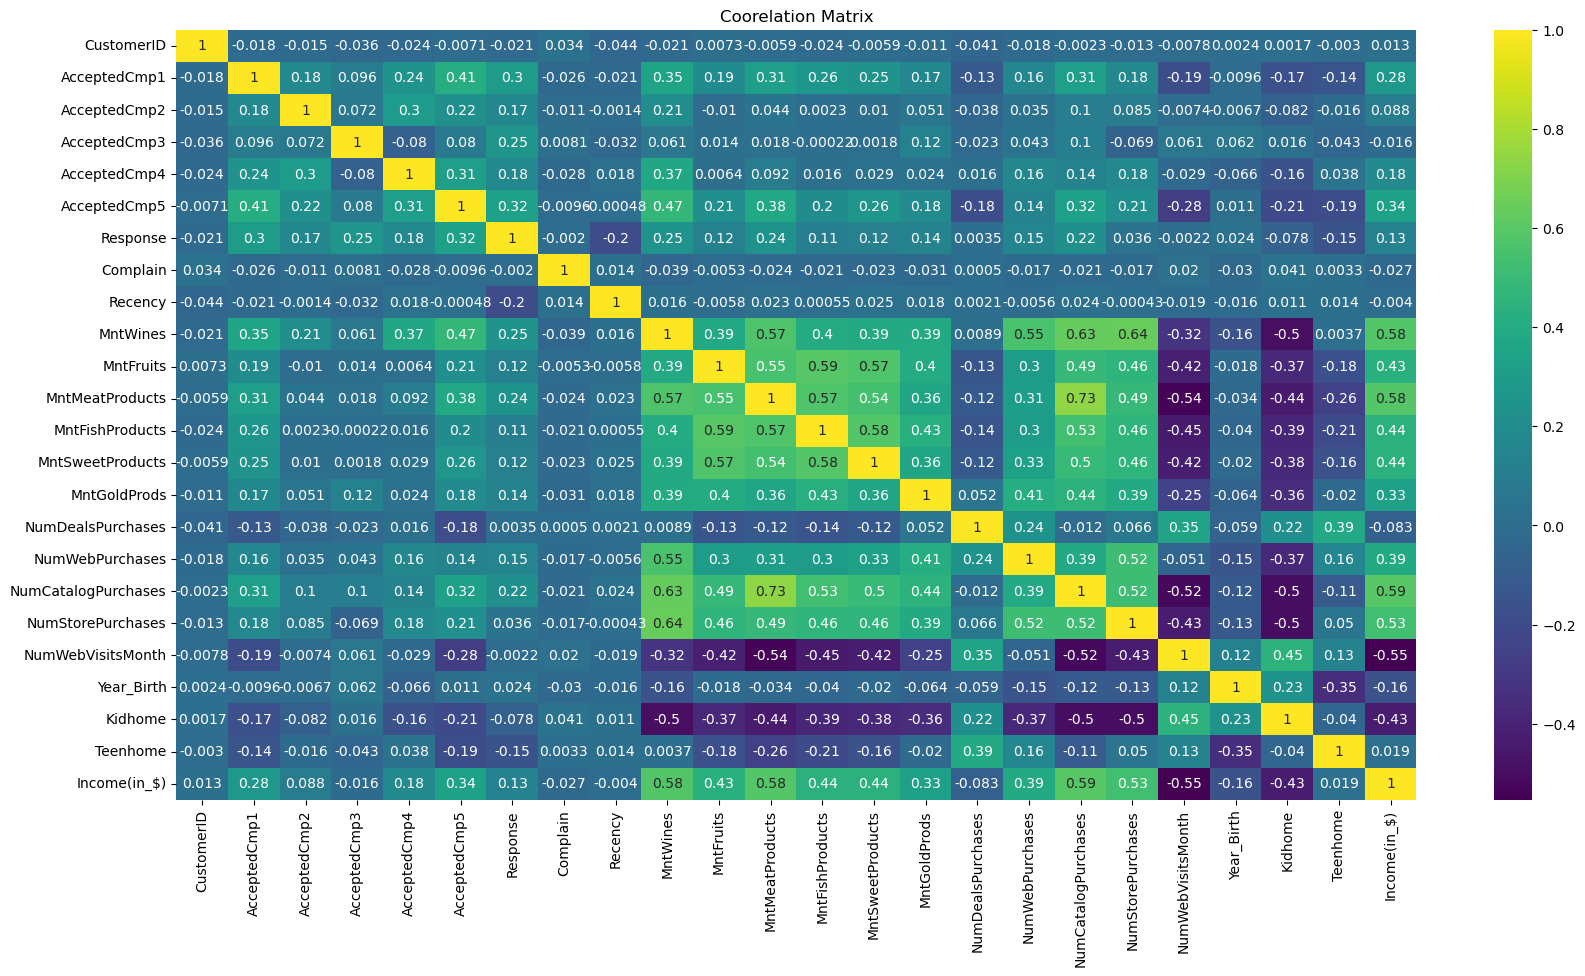

In [37]:
# HeatMap

plt.figure(figsize=(20,10))
sns.heatmap(count.corr(),cmap='viridis',annot=True)
plt.title('Coorelation Matrix')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

In [38]:
cat.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


In [39]:
pd.get_dummies(cat)

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2212,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2213,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2214,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [40]:
# Importing the libraries

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [41]:
for i in cat:
    cat[i]=label_encoder.fit_transform(cat[i])

In [42]:
cat.head()

,Education,Marital_Status,Country
0,2,2,6
1,2,4,1
2,2,3,7
3,2,5,0
4,2,4,6


--------------------------------------------------------------------------------------------------------------------------------

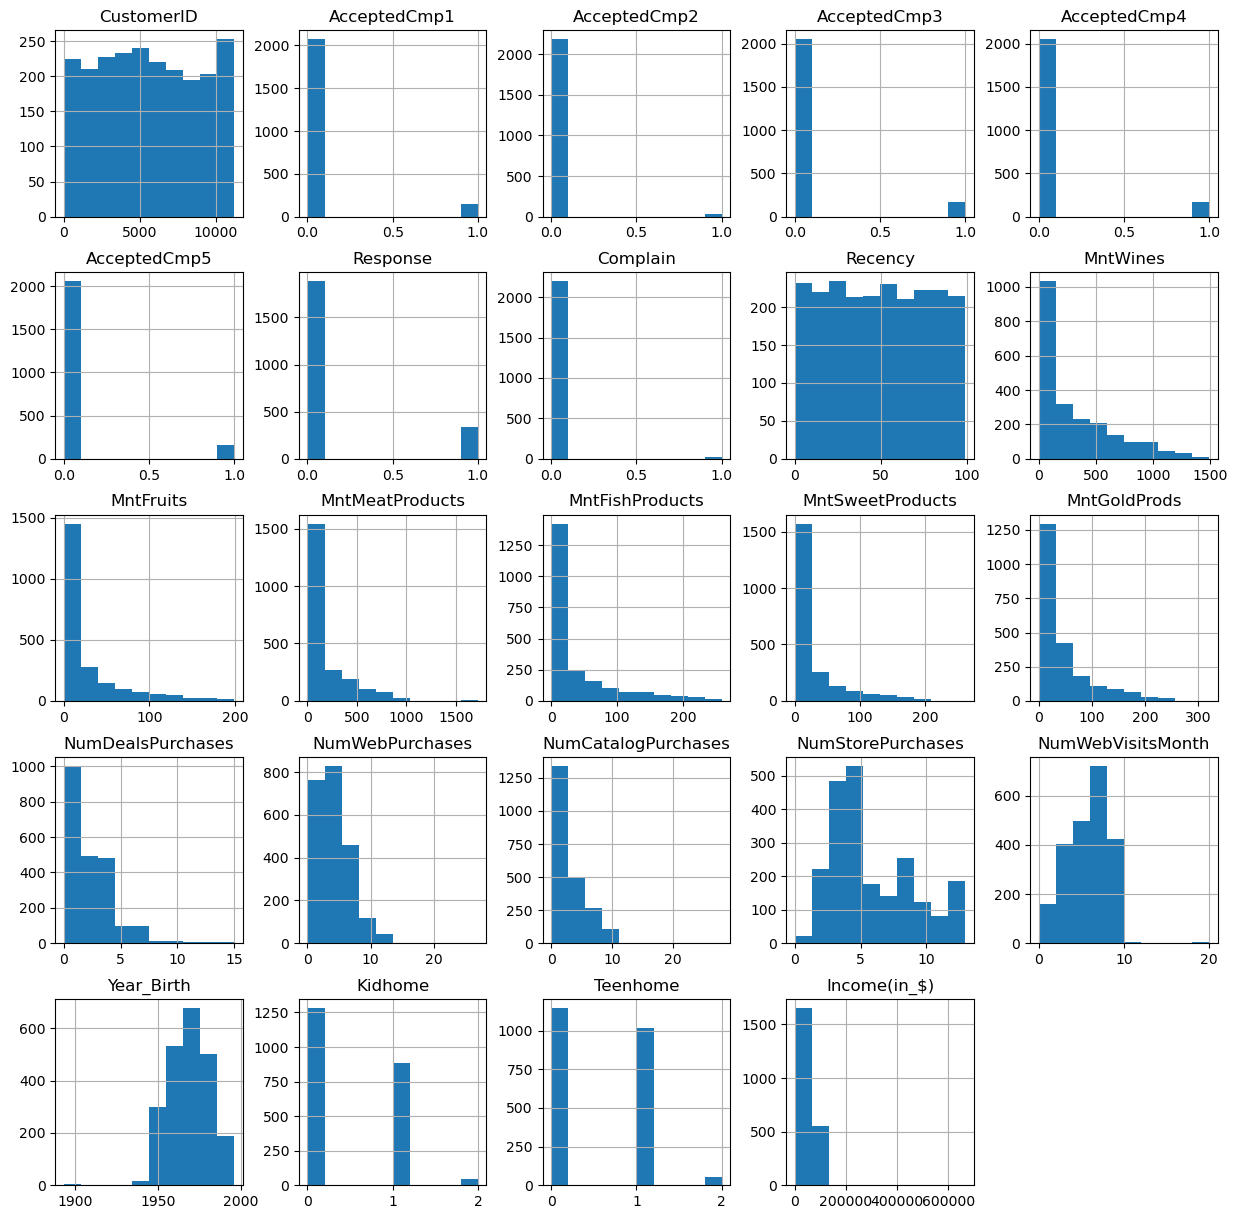

In [43]:
# Histplot

count.hist(figsize=(15,15))
plt.show()

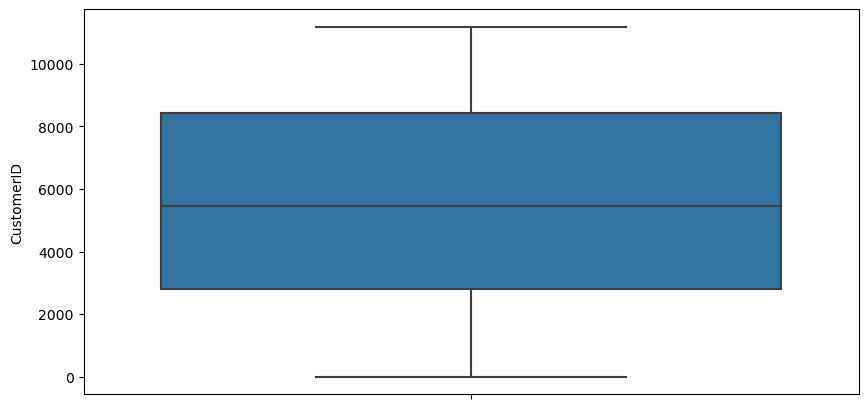

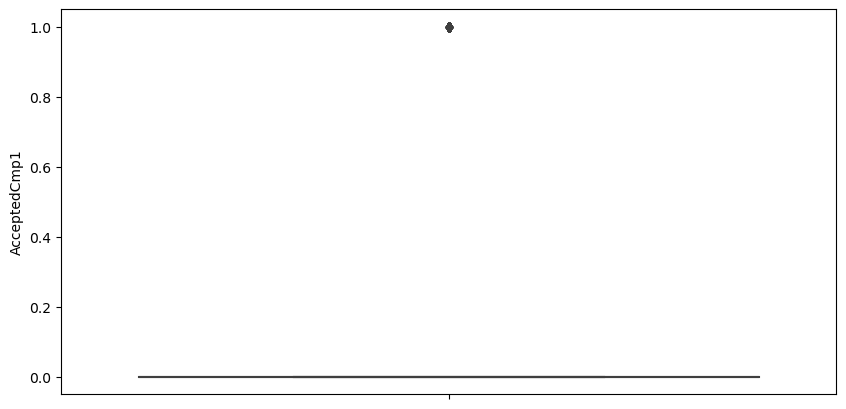

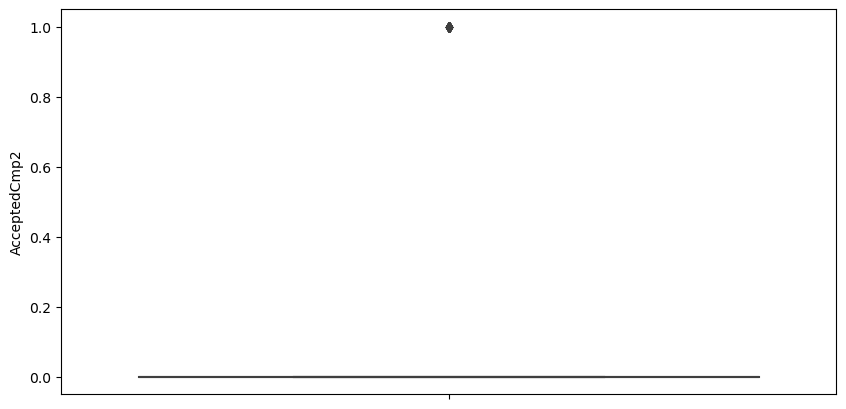

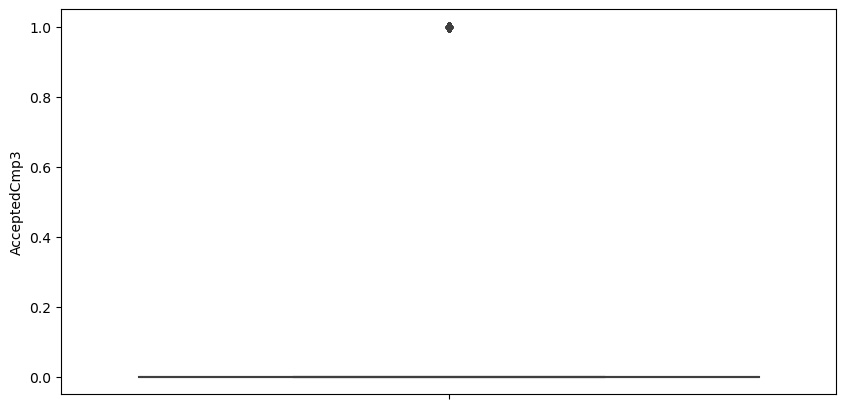

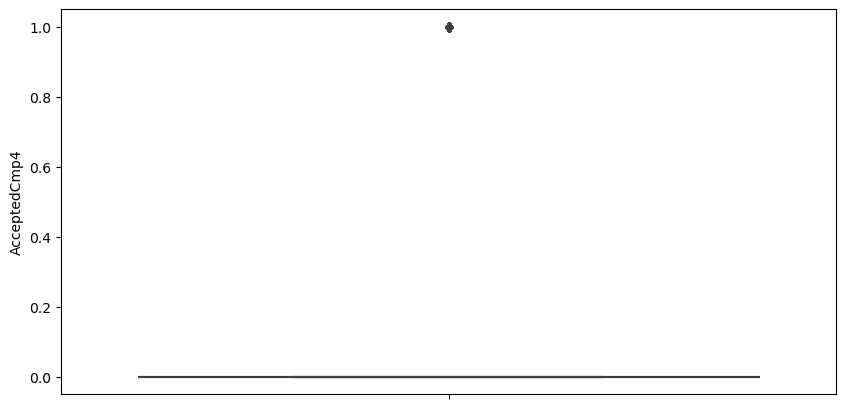

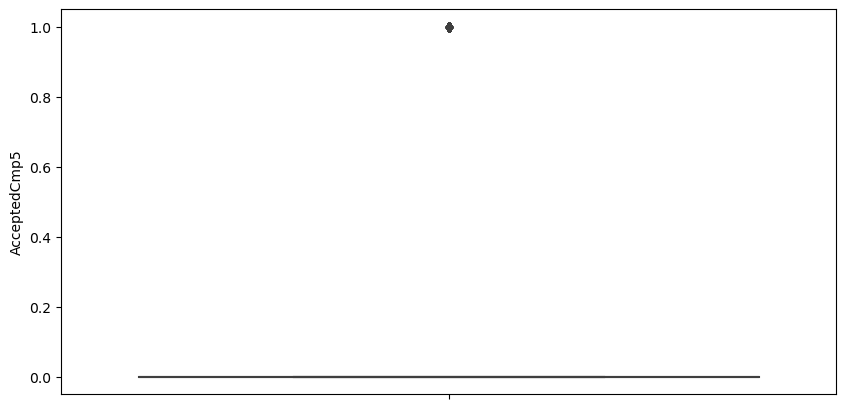

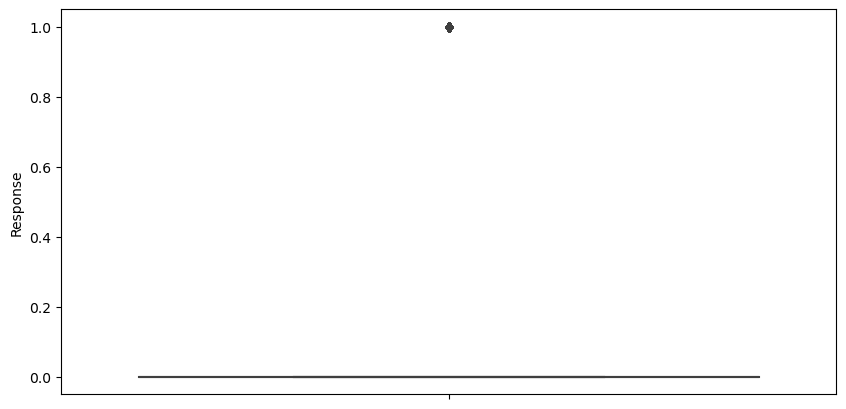

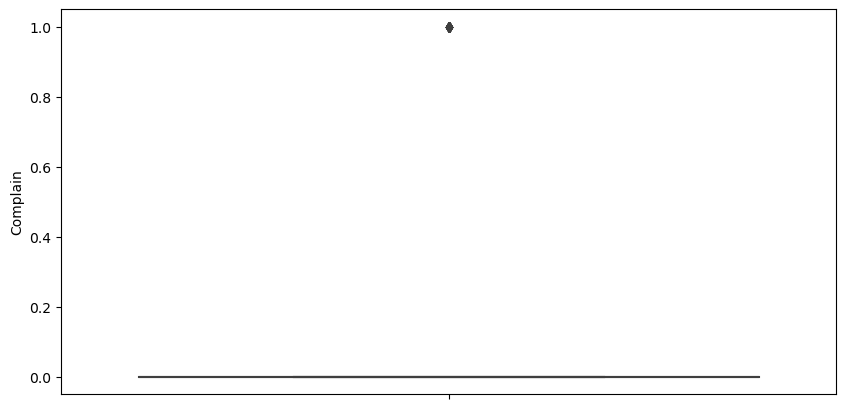

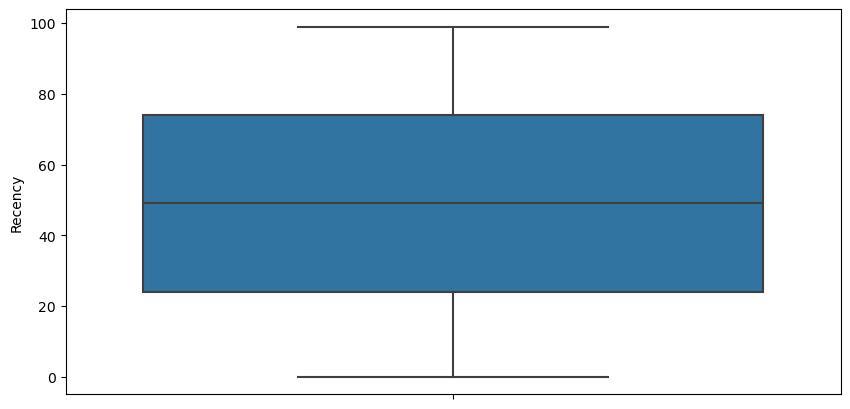

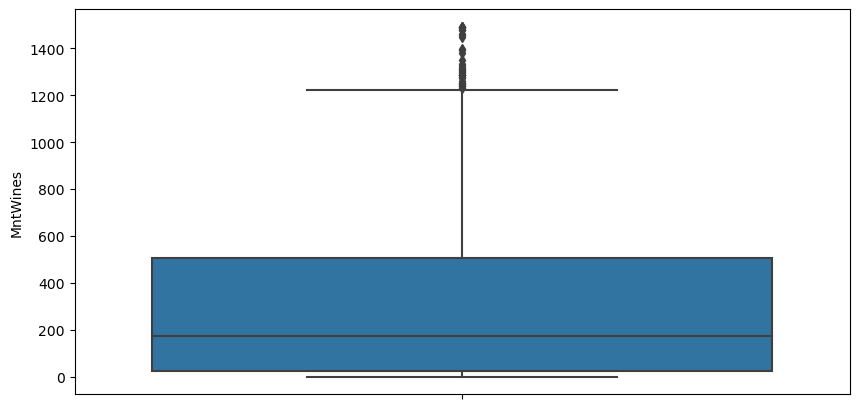

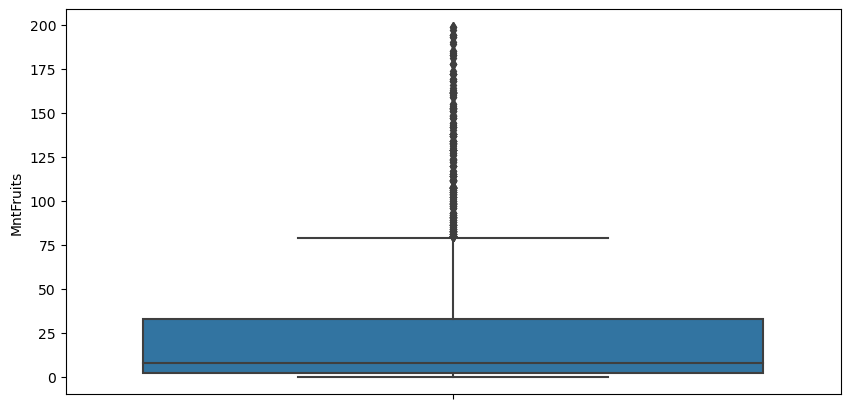

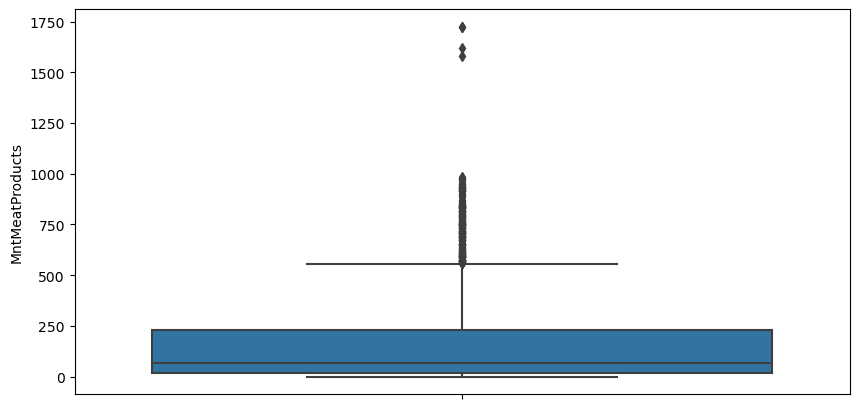

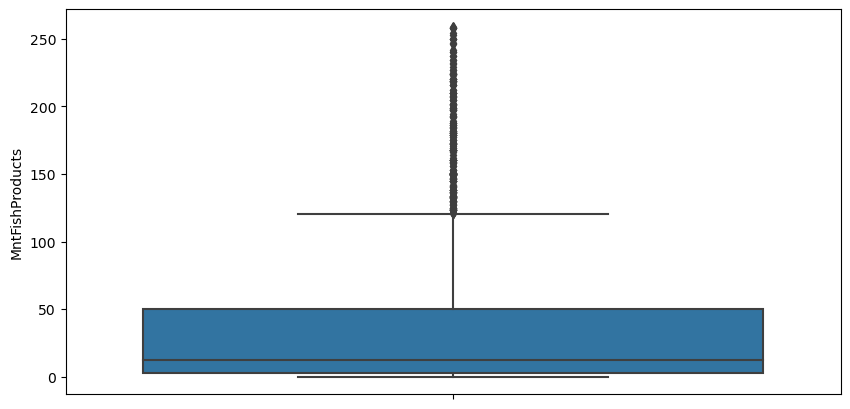

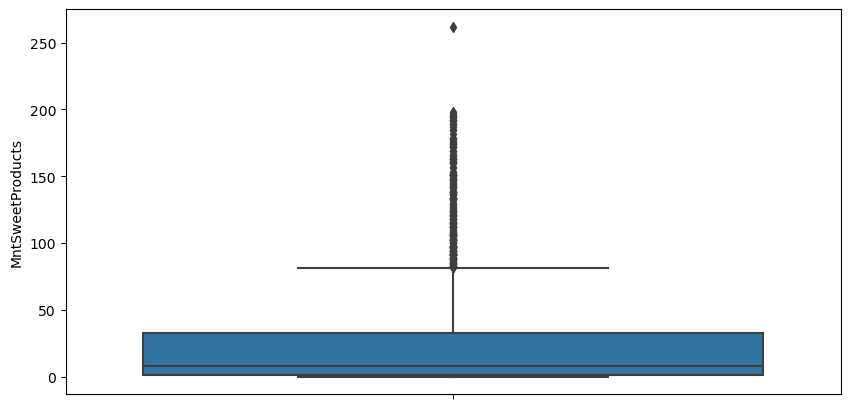

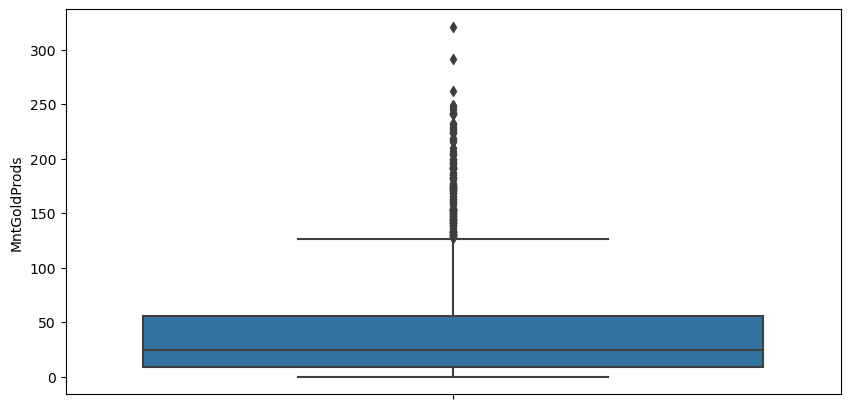

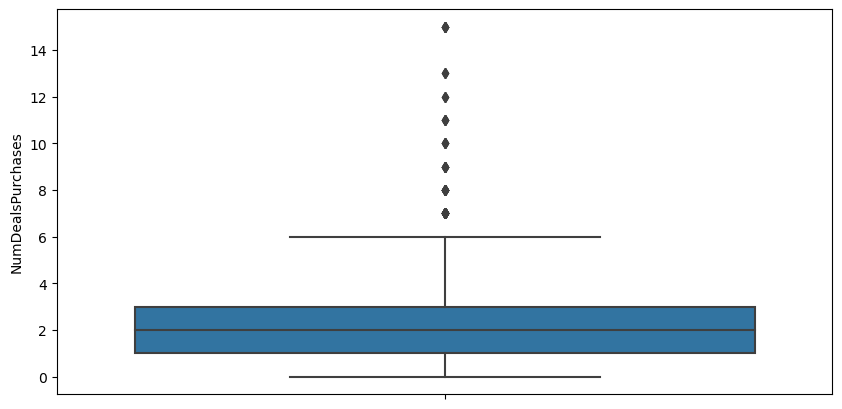

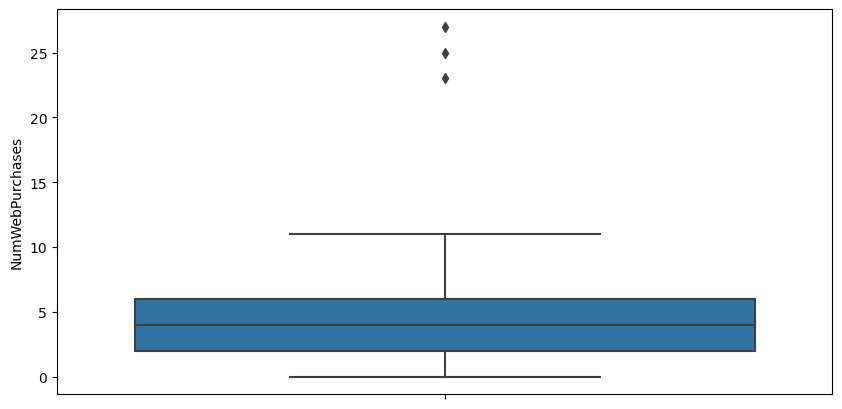

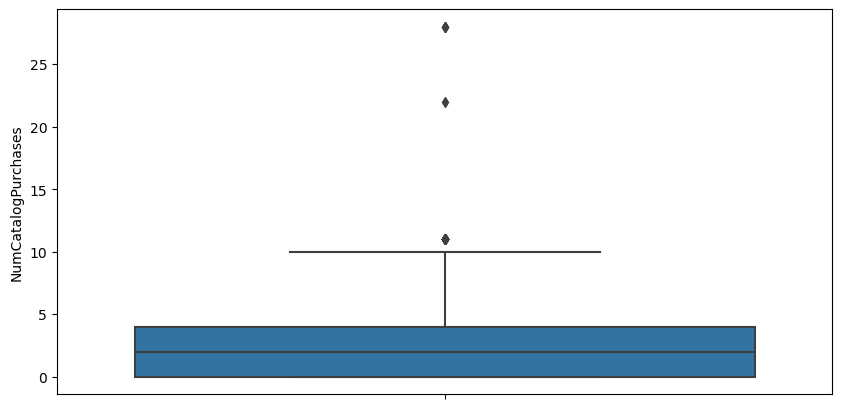

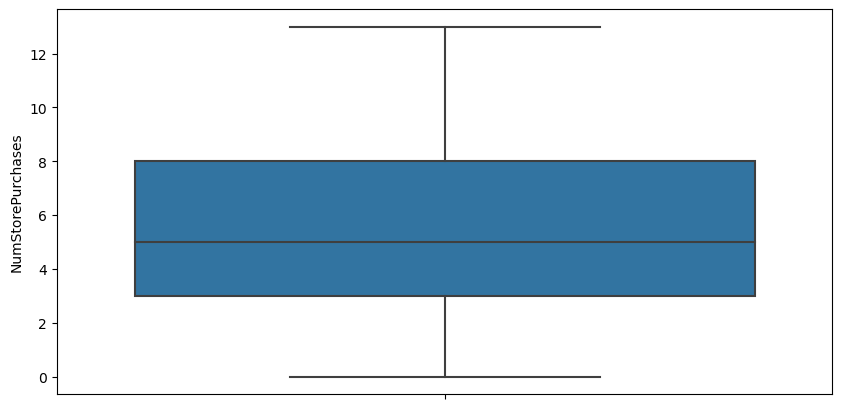

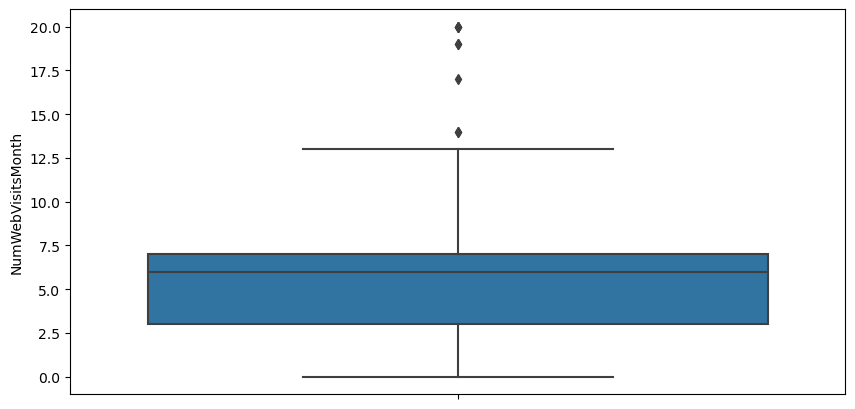

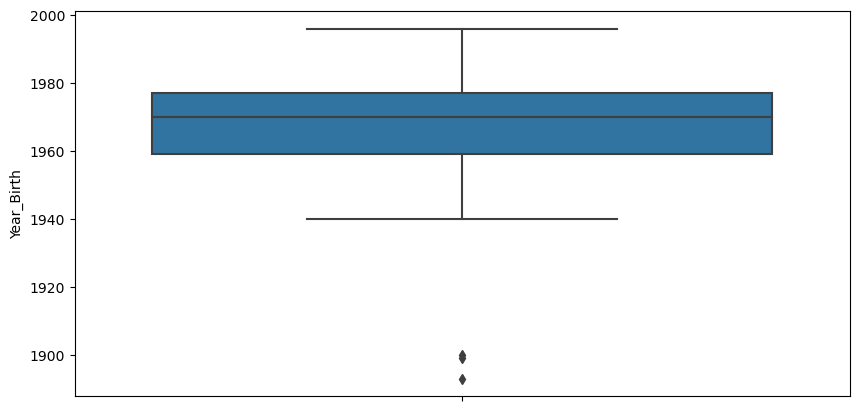

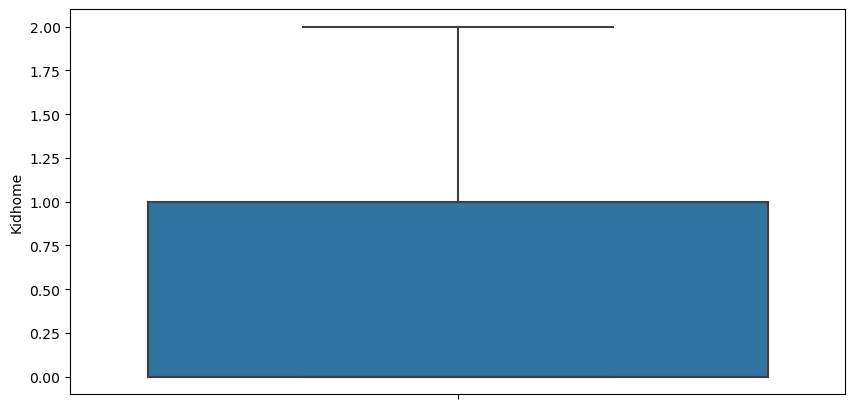

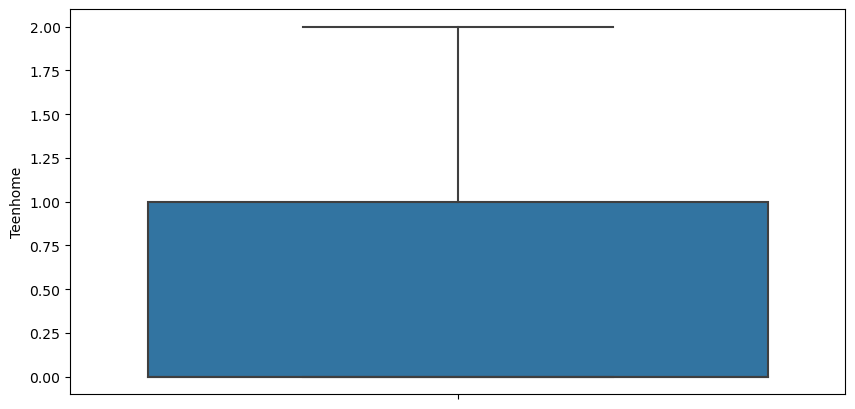

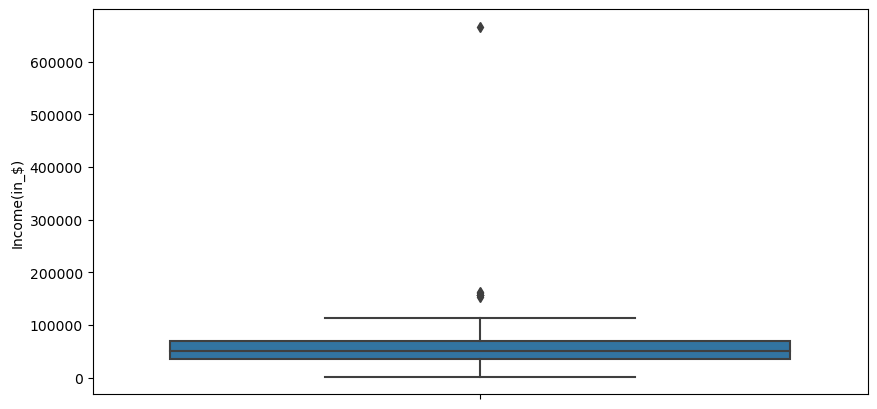

In [44]:
# Boxplot

for i in count:
    plt.figure(figsize=(10,5))
    sns.boxplot(y=i,data=count)
    plt.show()

In [45]:
w_data['Response'].value_counts()

Response
0    1883
1     333
Name: count, dtype: int64

In [46]:
count.columns

Index(['CustomerID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Year_Birth', 'Kidhome', 'Teenhome',
       'Income(in_$)'],
      dtype='object')

### Outliers Treatment

In [47]:
Q1 = count["MntWines"].quantile(0.25)
Q3 = count["MntWines"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_MntWines = count[(count["MntWines"] >= lower_bound) & (count["MntWines"] <= upper_bound)]
outliers_MntWines = count[(count['MntWines'] <= lower_bound) | (count['MntWines'] >= upper_bound)]

In [48]:
mean_no_outliers_MntWines=np.mean(count['MntWines'])
mean_no_outliers_MntWines

305.09160649819495

In [49]:
count.loc[outliers_MntWines.index, 'MntWines'] = mean_no_outliers_MntWines

________________________________________________________________________________________________________________________________

In [50]:
Q1 = count["MntFruits"].quantile(0.25)
Q3 = count["MntFruits"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_MntFruits = count[(count["MntFruits"] >= lower_bound) & (count["MntFruits"] <= upper_bound)]
outliers_MntFruits = count[(count["MntFruits"] <= lower_bound) | (count["MntFruits"] >= upper_bound)]

mean_no_outliers_MntFruits=np.mean(count['MntFruits'])
mean_no_outliers_MntFruits

26.356046931407942

In [51]:
count.loc[outliers_MntFruits.index, 'MntFruits'] = mean_no_outliers_MntFruits

********************************************************************************************************************************

In [52]:
Q1 = count["MntMeatProducts"].quantile(0.25)
Q3 = count["MntMeatProducts"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_MntMeatProducts = count[(count["MntMeatProducts"] >= lower_bound) & (count["MntMeatProducts"] <= upper_bound)]
outliers_MntMeatProducts = count[(count["MntMeatProducts"] <= lower_bound) | (count["MntMeatProducts"] >= upper_bound)]

mean_no_outliers_MntMeatProducts=np.mean(count['MntMeatProducts'])
mean_no_outliers_MntMeatProducts

166.99593862815885

In [53]:
count.loc[outliers_MntMeatProducts.index, 'MntMeatProducts'] = mean_no_outliers_MntMeatProducts

********************************************************************************************************************************

In [54]:
Q1 = count["MntFishProducts"].quantile(0.25)
Q3 = count["MntFishProducts"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_MntFishProducts = count[(count["MntFishProducts"] >= lower_bound) & (count["MntFishProducts"] <= upper_bound)]
outliers_MntFishProducts = count[(count["MntFishProducts"] <= lower_bound) | (count["MntFishProducts"] >= upper_bound)]

mean_no_outliers_MntFishProducts=np.mean(count['MntFishProducts'])
mean_no_outliers_MntFishProducts

37.63763537906137

In [55]:
count.loc[outliers_MntFishProducts.index, 'MntFishProducts'] = mean_no_outliers_MntFishProducts

********************************************************************************************************************************

In [56]:
Q1 = count["MntSweetProducts"].quantile(0.25)
Q3 = count["MntSweetProducts"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_MntSweetProducts = count[(count["MntSweetProducts"] >= lower_bound) & (count["MntSweetProducts"] <= upper_bound)]
outliers_MntSweetProducts = count[(count["MntSweetProducts"] <= lower_bound) | (count["MntSweetProducts"] >= upper_bound)]

mean_no_outliers_MntSweetProducts=np.mean(count['MntSweetProducts'])
mean_no_outliers_MntSweetProducts

27.028880866425993

In [57]:
count.loc[outliers_MntSweetProducts.index, 'MntSweetProducts'] = mean_no_outliers_MntSweetProducts

********************************************************************************************************************************

In [58]:
Q1 = count["MntGoldProds"].quantile(0.25)
Q3 = count["MntGoldProds"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_MntGoldProds = count[(count["MntGoldProds"] >= lower_bound) & (count["MntGoldProds"] <= upper_bound)]
outliers_MntGoldProds = count[(count["MntGoldProds"] <= lower_bound) | (count["MntGoldProds"] >= upper_bound)]

mean_no_outliers_MntGoldProds=np.mean(count['MntGoldProds'])
mean_no_outliers_MntGoldProds

43.96525270758123

In [59]:
count.loc[outliers_MntGoldProds.index, 'MntGoldProds'] = mean_no_outliers_MntGoldProds

********************************************************************************************************************************

In [60]:
Q1 = count["NumDealsPurchases"].quantile(0.25)
Q3 = count["NumDealsPurchases"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_NumDealsPurchases = count[(count["NumDealsPurchases"] >= lower_bound) & (count["NumDealsPurchases"] <= upper_bound)]
outliers_NumDealsPurchases = count[(count["NumDealsPurchases"] <= lower_bound) | (count["NumDealsPurchases"] >= upper_bound)]

mean_no_outliers_NumDealsPurchases=np.mean(count['NumDealsPurchases'])
mean_no_outliers_NumDealsPurchases

2.3235559566787005

In [61]:
count.loc[outliers_NumDealsPurchases.index, 'NumDealsPurchases'] = mean_no_outliers_NumDealsPurchases

********************************************************************************************************************************

In [62]:
Q1 = count["NumWebPurchases"].quantile(0.25)
Q3 = count["NumWebPurchases"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_NumWebPurchases = count[(count["NumWebPurchases"] >= lower_bound) & (count["NumWebPurchases"] <= upper_bound)]
outliers_NumWebPurchases = count[(count["NumWebPurchases"] <= lower_bound) | (count["NumWebPurchases"] >= upper_bound)]

mean_no_outliers_NumWebPurchases=np.mean(count['NumWebPurchases'])
mean_no_outliers_NumWebPurchases

4.08528880866426

In [63]:
count.loc[outliers_NumWebPurchases.index, 'NumWebPurchases'] = mean_no_outliers_NumWebPurchases

********************************************************************************************************************************

In [64]:
Q1 = count["NumCatalogPurchases"].quantile(0.25)
Q3 = count["NumCatalogPurchases"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_NumCatalogPurchases = count[(count["NumCatalogPurchases"] >= lower_bound) & (count["NumCatalogPurchases"] <= upper_bound)]
outliers_NumCatalogPurchases = count[(count["NumCatalogPurchases"] <= lower_bound) | (count["NumCatalogPurchases"] >= upper_bound)]

mean_no_outliers_NumCatalogPurchases=np.mean(count['NumCatalogPurchases'])
mean_no_outliers_NumCatalogPurchases

2.671028880866426

In [65]:
count.loc[outliers_NumCatalogPurchases.index, 'NumCatalogPurchases'] = mean_no_outliers_NumCatalogPurchases

********************************************************************************************************************************

In [66]:
Q1 = count["NumWebVisitsMonth"].quantile(0.25)
Q3 = count["NumWebVisitsMonth"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
no_outliers_NumWebVisitsMonth = count[(count["NumWebVisitsMonth"] >= lower_bound) & (count["NumWebVisitsMonth"] <= upper_bound)]
outliers_NumWebVisitsMonth = count[(count["NumWebVisitsMonth"] <= lower_bound) | (count["NumWebVisitsMonth"] >= upper_bound)]

mean_no_outliers_NumWebVisitsMonth=np.mean(count['NumWebVisitsMonth'])
mean_no_outliers_NumWebVisitsMonth

5.319043321299639

In [67]:
count.loc[outliers_NumWebVisitsMonth.index, 'NumWebVisitsMonth'] = mean_no_outliers_NumWebVisitsMonth

********************************************************************************************************************************

## Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns.

In [68]:
count.columns

Index(['CustomerID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Year_Birth', 'Kidhome', 'Teenhome',
       'Income(in_$)'],
      dtype='object')

In [69]:
from scipy.stats import ttest_ind

In [70]:
import scipy.stats

### H0: There is no difference in the amount spent on Product category between responders and non-responders in campaign 1
### H1: There is a difference in the amount spent on Product category between responders and non-responders in campaign 1

In [71]:

responders = count[count['AcceptedCmp1'] == 1]
non_responders = count[count['AcceptedCmp1'] == 0]

stats.levene(responders.MntWines,non_responders.MntWines)


LeveneResult(statistic=4.427884323311826, pvalue=0.035468788324559804)

In [72]:
# Hypothesis testing (t-test) 2 sample t test on unequal Variance 

print("MntWines X Campaign1         :",scipy.stats.ttest_ind(responders.MntWines, non_responders.MntWines))
print("MntFruits X Campaign1        :",scipy.stats.ttest_ind(responders.MntFruits, non_responders.MntFruits))
print("MntMeatProducts X Campaign1  :",scipy.stats.ttest_ind(responders.MntMeatProducts, non_responders.MntMeatProducts))
print("MntFishProducts X Campaign1  :",scipy.stats.ttest_ind(responders.MntFishProducts, non_responders.MntFishProducts))
print("MntSweetProducts X Campaign1 :",scipy.stats.ttest_ind(responders.MntSweetProducts, non_responders.MntSweetProducts))
print("MntGoldProds X Campaign1     :",scipy.stats.ttest_ind(responders.MntGoldProds, non_responders.MntGoldProds))

MntWines X Campaign1         : TtestResult(statistic=15.99897853989476, pvalue=1.325357092680839e-54, df=2214.0)
MntFruits X Campaign1        : TtestResult(statistic=6.8324352117707345, pvalue=1.0751958515811701e-11, df=2214.0)
MntMeatProducts X Campaign1  : TtestResult(statistic=12.483225374557396, pvalue=1.3094713293861944e-34, df=2214.0)
MntFishProducts X Campaign1  : TtestResult(statistic=9.953542652580866, pvalue=7.297353904929777e-23, df=2214.0)
MntSweetProducts X Campaign1 : TtestResult(statistic=9.810332358377979, pvalue=2.8689145025637976e-22, df=2214.0)
MntGoldProds X Campaign1     : TtestResult(statistic=6.23331701354393, pvalue=5.45140641334941e-10, df=2214.0)


In [73]:
# H0: There is no difference in the amount spent on Product category between responders and non-responders in campaign 2
# H1: There is a difference in the amount spent on Product category between responders and non-responders in campaign 2


responders = count[count['AcceptedCmp2'] == 1]
non_responders = count[count['AcceptedCmp2'] == 0]

stats.levene(responders.MntWines,non_responders.MntWines)

LeveneResult(statistic=6.896352893491952, pvalue=0.008696681710113683)

In [74]:
# Hypothesis testing (t-test) 2 sample t test on unequal Variance 

print("MntWines X Campaign2         :",scipy.stats.ttest_ind(responders.MntWines, non_responders.MntWines))
print("MntFruits X Campaign2        :",scipy.stats.ttest_ind(responders.MntFruits, non_responders.MntFruits))
print("MntMeatProducts X Campaign2  :",scipy.stats.ttest_ind(responders.MntMeatProducts, non_responders.MntMeatProducts))
print("MntFishProducts X Campaign2  :",scipy.stats.ttest_ind(responders.MntFishProducts, non_responders.MntFishProducts))
print("MntSweetProducts X Campaign2 :",scipy.stats.ttest_ind(responders.MntSweetProducts, non_responders.MntSweetProducts))
print("MntGoldProds X Campaign2     :",scipy.stats.ttest_ind(responders.MntGoldProds, non_responders.MntGoldProds))

MntWines X Campaign2         : TtestResult(statistic=5.193698613372527, pvalue=2.250011538281832e-07, df=2214.0)
MntFruits X Campaign2        : TtestResult(statistic=0.9997322399301362, pvalue=0.3175493550067263, df=2214.0)
MntMeatProducts X Campaign2  : TtestResult(statistic=2.4645235787627082, pvalue=0.013794994481112328, df=2214.0)
MntFishProducts X Campaign2  : TtestResult(statistic=2.1662886372156214, pvalue=0.030395527451445144, df=2214.0)
MntSweetProducts X Campaign2 : TtestResult(statistic=1.4455461653105084, pvalue=0.1484460632983041, df=2214.0)
MntGoldProds X Campaign2     : TtestResult(statistic=2.428859550996842, pvalue=0.015225518476462273, df=2214.0)


In [75]:
# H0: There is no difference in the amount spent on Product category between responders and non-responders in campaign 3
# H1: There is a difference in the amount spent on Product category between responders and non-responders in campaign 3


responders = count[count['AcceptedCmp3'] == 1]
non_responders = count[count['AcceptedCmp3'] == 0]

stats.levene(responders.MntWines,non_responders.MntWines)

LeveneResult(statistic=11.828030625088397, pvalue=0.0005942558667956724)

In [76]:
# Hypothesis testing (t-test) 2 sample t test on unequal Variance 

print("MntWines X Campaign3         :",scipy.stats.ttest_ind(responders.MntWines, non_responders.MntWines))
print("MntFruits X Campaign3        :",scipy.stats.ttest_ind(responders.MntFruits, non_responders.MntFruits))
print("MntMeatProducts X Campaign3  :",scipy.stats.ttest_ind(responders.MntMeatProducts, non_responders.MntMeatProducts))
print("MntFishProducts X Campaign3  :",scipy.stats.ttest_ind(responders.MntFishProducts, non_responders.MntFishProducts))
print("MntSweetProducts X Campaign3 :",scipy.stats.ttest_ind(responders.MntSweetProducts, non_responders.MntSweetProducts))
print("MntGoldProds X Campaign3     :",scipy.stats.ttest_ind(responders.MntGoldProds, non_responders.MntGoldProds))

MntWines X Campaign3         : TtestResult(statistic=2.6984158926207833, pvalue=0.007019940423948835, df=2214.0)
MntFruits X Campaign3        : TtestResult(statistic=0.09256981092945586, pvalue=0.926253703265437, df=2214.0)
MntMeatProducts X Campaign3  : TtestResult(statistic=0.37847364960786795, pvalue=0.705115051521535, df=2214.0)
MntFishProducts X Campaign3  : TtestResult(statistic=-0.671368167886092, pvalue=0.5020560571631976, df=2214.0)
MntSweetProducts X Campaign3 : TtestResult(statistic=-0.8090203267236001, pvalue=0.4185903833884159, df=2214.0)
MntGoldProds X Campaign3     : TtestResult(statistic=3.8249114451734605, pvalue=0.00013443745282526467, df=2214.0)


In [77]:
# H0: There is no difference in the amount spent on Product category between responders and non-responders in campaign 4
# H1: There is a difference in the amount spent on Product category between responders and non-responders in campaign 4


responders = count[count['AcceptedCmp4'] == 1]
non_responders = count[count['AcceptedCmp4'] == 0]

stats.levene(responders.MntWines,non_responders.MntWines)

LeveneResult(statistic=13.321198278620049, pvalue=0.00026849796504012174)

In [78]:
# Hypothesis testing (t-test) 2 sample t test on unequal Variance 

print("MntWines X Campaign4         :",scipy.stats.ttest_ind(responders.MntWines, non_responders.MntWines))
print("MntFruits X Campaign4        :",scipy.stats.ttest_ind(responders.MntFruits, non_responders.MntFruits))
print("MntMeatProducts X Campaign4  :",scipy.stats.ttest_ind(responders.MntMeatProducts, non_responders.MntMeatProducts))
print("MntFishProducts X Campaign4  :",scipy.stats.ttest_ind(responders.MntFishProducts, non_responders.MntFishProducts))
print("MntSweetProducts X Campaign4 :",scipy.stats.ttest_ind(responders.MntSweetProducts, non_responders.MntSweetProducts))
print("MntGoldProds X Campaign4     :",scipy.stats.ttest_ind(responders.MntGoldProds, non_responders.MntGoldProds))

MntWines X Campaign4         : TtestResult(statistic=15.352391302991709, pvalue=1.259795862960083e-50, df=2214.0)
MntFruits X Campaign4        : TtestResult(statistic=2.0105331366120796, pvalue=0.04449584514823344, df=2214.0)
MntMeatProducts X Campaign4  : TtestResult(statistic=4.3993598729689545, pvalue=1.1371859305405124e-05, df=2214.0)
MntFishProducts X Campaign4  : TtestResult(statistic=1.387861058672605, pvalue=0.16531900687635914, df=2214.0)
MntSweetProducts X Campaign4 : TtestResult(statistic=1.3016463488987948, pvalue=0.19317272643134856, df=2214.0)
MntGoldProds X Campaign4     : TtestResult(statistic=2.601416877653367, pvalue=0.009345796427121444, df=2214.0)


In [79]:
# H0: There is no difference in the amount spent on Product category between responders and non-responders in campaign 5
# H1: There is a difference in the amount spent on Product category between responders and non-responders in campaign 5


responders = count[count['AcceptedCmp5'] == 1]
non_responders = count[count['AcceptedCmp5'] == 0]

stats.levene(responders.MntWines,non_responders.MntWines)

LeveneResult(statistic=6.762239377447435, pvalue=0.009372619143858143)

In [80]:
# Hypothesis testing (t-test) 2 sample t test on unequal Variance 

print("MntWines X Campaign5         :",scipy.stats.ttest_ind(responders.MntWines, non_responders.MntWines))
print("MntFruits X Campaign5        :",scipy.stats.ttest_ind(responders.MntFruits, non_responders.MntFruits))
print("MntMeatProducts X Campaign5  :",scipy.stats.ttest_ind(responders.MntMeatProducts, non_responders.MntMeatProducts))
print("MntFishProducts X Campaign5  :",scipy.stats.ttest_ind(responders.MntFishProducts, non_responders.MntFishProducts))
print("MntSweetProducts X Campaign5 :",scipy.stats.ttest_ind(responders.MntSweetProducts, non_responders.MntSweetProducts))
print("MntGoldProds X Campaign5     :",scipy.stats.ttest_ind(responders.MntGoldProds, non_responders.MntGoldProds))

MntWines X Campaign5         : TtestResult(statistic=19.466291035364534, pvalue=4.895407273081708e-78, df=2214.0)
MntFruits X Campaign5        : TtestResult(statistic=10.007738054376912, pvalue=4.326692955710194e-23, df=2214.0)
MntMeatProducts X Campaign5  : TtestResult(statistic=13.224786461247714, pvalue=1.7460018257313744e-38, df=2214.0)
MntFishProducts X Campaign5  : TtestResult(statistic=11.693573795531872, pvalue=1.0765646411381976e-30, df=2214.0)
MntSweetProducts X Campaign5 : TtestResult(statistic=11.064320804333512, pvalue=9.819785509804745e-28, df=2214.0)
MntGoldProds X Campaign5     : TtestResult(statistic=7.553189613572441, pvalue=6.173242945665226e-14, df=2214.0)


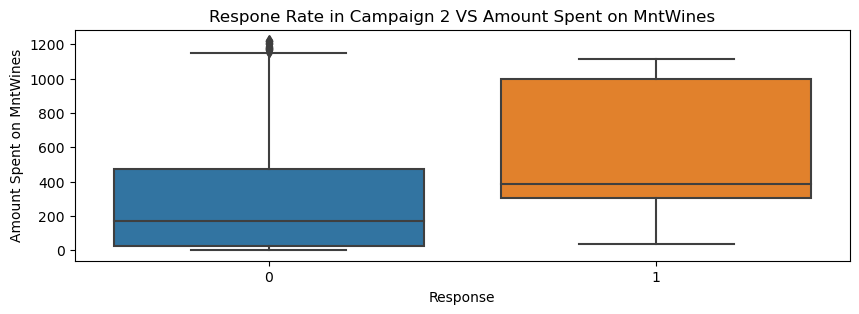

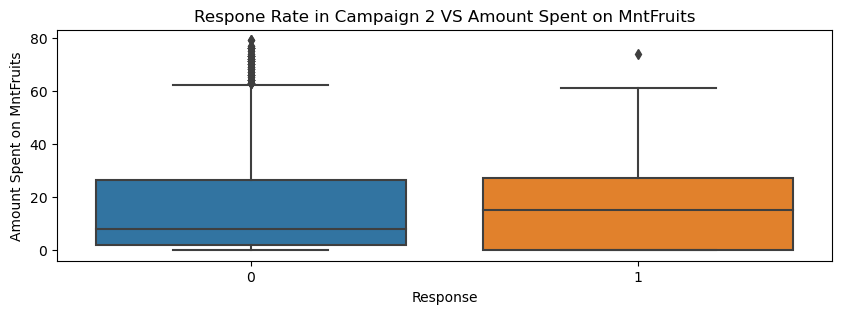

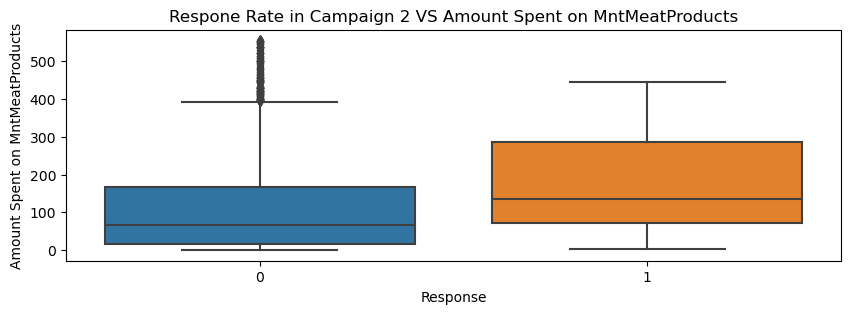

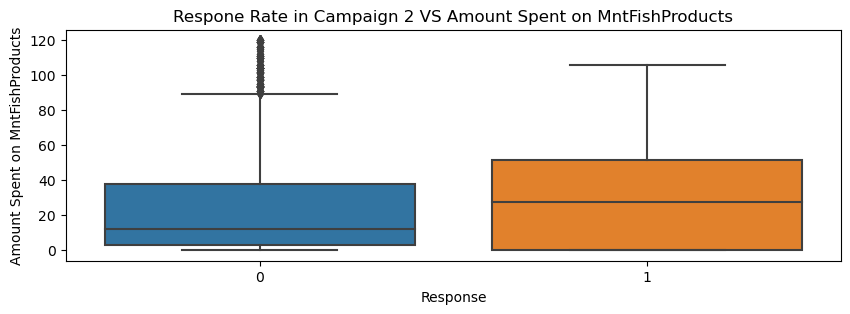

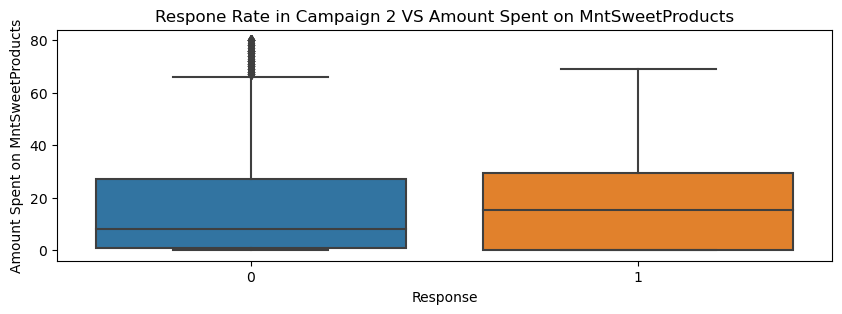

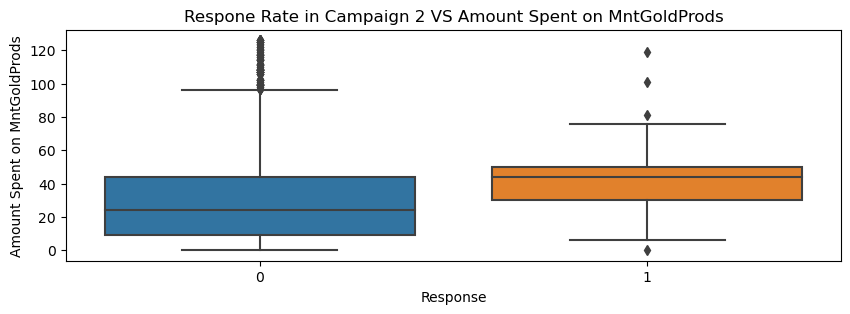

In [81]:
product_cat= ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds',]
response_count=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5']

for catg in product_cat:
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=count, x='AcceptedCmp2', y=catg)
    plt.title(f'Respone Rate in Campaign 2 VS Amount Spent on {catg}')
    plt.xlabel('Response')
    plt.ylabel(f'Amount Spent on {catg}')
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------

## Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products

In [82]:
income_bins = [0, 30000, 60000, 100000, 200000, float('inf')]  
income_labels = ['Below Middle Class', 'Middle Class', 'Upper Middle Class', 'Rich', 'High Net Worth']

# Use pd.cut() to create a new column 'Income_Category'

count['income_category'] = pd.cut(count['Income(in_$)'], bins=income_bins, labels=income_labels, right=False)


### H0: Income does not impact the amount spent on wine, meat products, gold products, or fish products.
### Ha: Income impacts the amount spent on wine, meat products, gold products, or fish products.

In [83]:
MinRange_income = count[count['Income(in_$)'] < count['Income(in_$)'].median()]['MntWines']
MediumRange_income = count[(count['Income(in_$)'] >= count['Income(in_$)'].median()) & (count['Income(in_$)'] < count['Income(in_$)'].quantile(0.75))]['MntWines']
MaxRange_income=count[count['Income(in_$)']>=count['Income(in_$)'].quantile(0.75)]['MntWines']

In [84]:
# HO y1 and y2 are equal 
# H1 y1 and y2 are not equal

print("Normality Test")

print("MinRange_income    :",stats.shapiro(MinRange_income))
print("MediumRange_income :",stats.shapiro(MediumRange_income))
print("MaxRange_income    :",stats.shapiro(MaxRange_income))
print("MntWines           :",stats.shapiro(count['MntWines']))

Normality Test
MinRange_income    : ShapiroResult(statistic=0.6143801212310791, pvalue=3.5032461608120427e-44)
MediumRange_income : ShapiroResult(statistic=0.9562218189239502, pvalue=9.173052942235138e-12)
MaxRange_income    : ShapiroResult(statistic=0.971718430519104, pvalue=7.4161454755028444e-09)
MntWines           : ShapiroResult(statistic=0.8468923568725586, pvalue=6.01297171041779e-42)


In [85]:
# HO variance are equal 
# H1 variance are not equal

print("Variance Test :",stats.levene(MinRange_income,MediumRange_income,MaxRange_income))

Variance Test : LeveneResult(statistic=399.58442820861285, pvalue=6.949821483042748e-149)


In [86]:
print("One Way ANOVA Test : ",scipy.stats.f_oneway(MinRange_income,MediumRange_income,MaxRange_income))

One Way ANOVA Test :  F_onewayResult(statistic=1154.1461074264837, pvalue=0.0)


#### - Income impacts the amount spent on wine

--------------------------------------------------------------------------------------------------------------------------------

In [87]:
MinRange_income = count[count['Income(in_$)'] < count['Income(in_$)'].median()]['MntMeatProducts']
MediumRange_income = count[(count['Income(in_$)'] >= count['Income(in_$)'].median()) & (count['Income(in_$)'] < count['Income(in_$)'].quantile(0.75))]['MntMeatProducts']
MaxRange_income=count[count['Income(in_$)']>=count['Income(in_$)'].quantile(0.75)]['MntMeatProducts']

In [88]:
# HO y1 and y2 are equal 
# H1 y1 and y2 are not equal

print("Normality Test")
print("MinRange_income    :",stats.shapiro(MinRange_income))
print("MediumRange_income :",stats.shapiro(MediumRange_income))
print("MaxRange_income    :",stats.shapiro(MaxRange_income))
print("MntMeatProducts    :",stats.shapiro(count['MntMeatProducts']))

Normality Test
MinRange_income    : ShapiroResult(statistic=0.6934155225753784, pvalue=8.409752603798957e-41)
MediumRange_income : ShapiroResult(statistic=0.9007090330123901, pvalue=1.7157237576919235e-18)
MaxRange_income    : ShapiroResult(statistic=0.9049165844917297, pvalue=4.286530584359513e-18)
MntMeatProducts    : ShapiroResult(statistic=0.8107100129127502, pvalue=2.802596928649634e-45)


In [89]:
# HO variance are equal 
# H1 variance are not equal

print("Variance Test :",stats.levene(MinRange_income,MediumRange_income,MaxRange_income))

Variance Test : LeveneResult(statistic=388.7073619846457, pvalue=2.1140518822726754e-145)


In [90]:
print("One Way ANOVA Test : ",scipy.stats.f_oneway(MinRange_income,MediumRange_income,MaxRange_income))

One Way ANOVA Test :  F_onewayResult(statistic=1162.6947805824311, pvalue=0.0)


#### -Income impacts the amount spent on Meat Products

--------------------------------------------------------------------------------------------------------------------------------

In [91]:
MinRange_income = count[count['Income(in_$)'] < count['Income(in_$)'].median()]['MntGoldProds']
MediumRange_income = count[(count['Income(in_$)'] >= count['Income(in_$)'].median()) & (count['Income(in_$)'] < count['Income(in_$)'].quantile(0.75))]['MntGoldProds']
MaxRange_income=count[count['Income(in_$)']>=count['Income(in_$)'].quantile(0.75)]['MntGoldProds']

In [92]:
# HO y1 and y2 are equal 
# H1 y1 and y2 are not equal

print("Normality Test")
print("MinRange_income    :",stats.shapiro(MinRange_income))
print("MediumRange_income :",stats.shapiro(MediumRange_income))
print("MaxRange_income    :",stats.shapiro(MaxRange_income))
print("MntGoldProds       :",stats.shapiro(count['MntGoldProds']))

Normality Test
MinRange_income    : ShapiroResult(statistic=0.7539966106414795, pvalue=1.1104839672188048e-37)
MediumRange_income : ShapiroResult(statistic=0.9315735697746277, pvalue=3.165769334978713e-15)
MaxRange_income    : ShapiroResult(statistic=0.9357611536979675, pvalue=1.0475102298697532e-14)
MntGoldProds       : ShapiroResult(statistic=0.8762264847755432, pvalue=8.337955675680811e-39)


In [93]:
# HO variance are equal 
# H1 variance are not equal

print("Variance Test :",stats.levene(MinRange_income,MediumRange_income,MaxRange_income))

Variance Test : LeveneResult(statistic=42.530990627202364, pvalue=7.501904202523415e-19)


In [94]:
print("One Way ANOVA Test : ",scipy.stats.f_oneway(MinRange_income,MediumRange_income,MaxRange_income))

One Way ANOVA Test :  F_onewayResult(statistic=245.51061459960744, pvalue=5.043851263439497e-97)


#### -Income does not impact the amount spent on Gold products

--------------------------------------------------------------------------------------------------------------------------------

In [95]:
MinRange_income = count[count['Income(in_$)'] < count['Income(in_$)'].median()]['MntFishProducts']
MediumRange_income = count[(count['Income(in_$)'] >= count['Income(in_$)'].median()) & (count['Income(in_$)'] < count['Income(in_$)'].quantile(0.75))]['MntFishProducts']
MaxRange_income=count[count['Income(in_$)']>=count['Income(in_$)'].quantile(0.75)]['MntFishProducts']

In [96]:
# HO y1 and y2 are equal 
# H1 y1 and y2 are not equal

print("Normality Test")
print("MinRange_income    :",stats.shapiro(MinRange_income))
print("MediumRange_income :",stats.shapiro(MediumRange_income))
print("MaxRange_income    :",stats.shapiro(MaxRange_income))
print("MntFishProducts    :",stats.shapiro(count['MntFishProducts']))

Normality Test
MinRange_income    : ShapiroResult(statistic=0.6215032339096069, pvalue=6.58610278232664e-44)
MediumRange_income : ShapiroResult(statistic=0.8534658551216125, pvalue=2.8143777783544427e-22)
MaxRange_income    : ShapiroResult(statistic=0.9213396310806274, pvalue=2.08106929240868e-16)
MntFishProducts    : ShapiroResult(statistic=0.8055112361907959, pvalue=1.401298464324817e-45)


In [97]:
# HO variance are equal 
# H1 variance are not equal

print("Variance Test :",stats.levene(MinRange_income,MediumRange_income,MaxRange_income))

Variance Test : LeveneResult(statistic=137.91250026271308, pvalue=3.5824030098250494e-57)


In [98]:
print("One Way ANOVA Test : ",scipy.stats.f_oneway(MinRange_income,MediumRange_income,MaxRange_income))

One Way ANOVA Test :  F_onewayResult(statistic=528.6965455904461, pvalue=2.0753075647062877e-188)


#### -Income does not impact the amount spent on Fish products.

--------------------------------------------------------------------------------------------------------------------------------

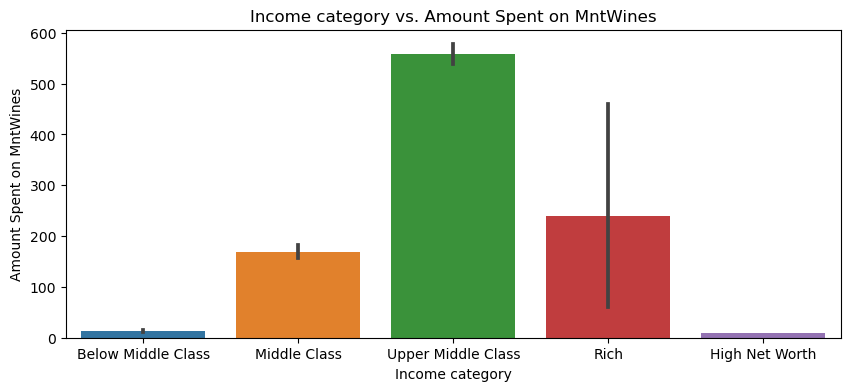

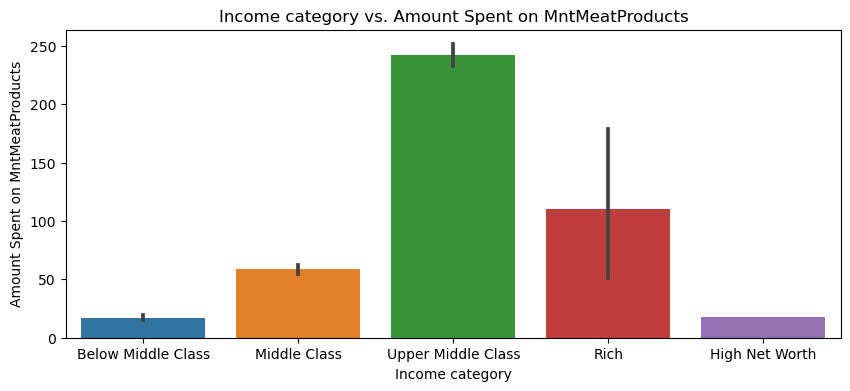

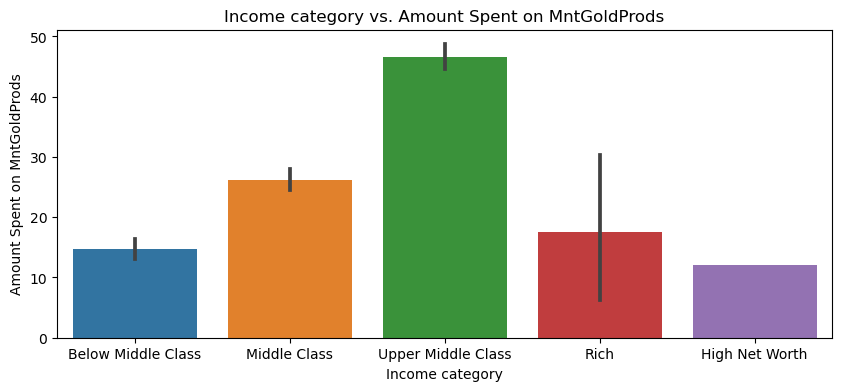

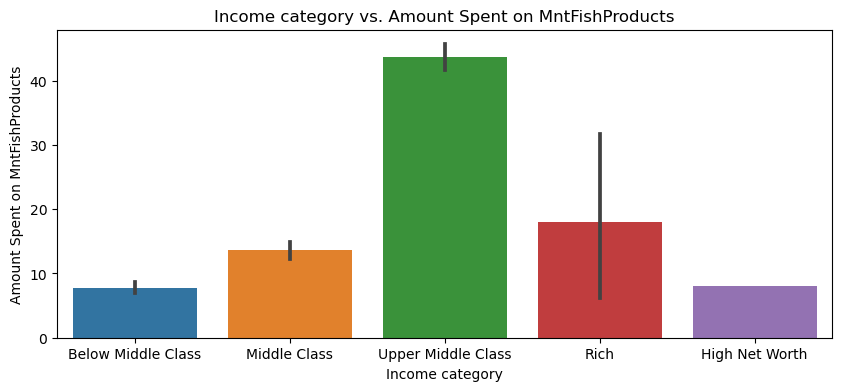

In [99]:
product_categories = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']

for category in product_categories:
    plt.figure(figsize=(10,4))
    sns.barplot(data=count, x='income_category', y=category)
    plt.title(f'Income category vs. Amount Spent on {category}')
    plt.xlabel('Income category')
    plt.ylabel(f'Amount Spent on {category}')
    plt.show()

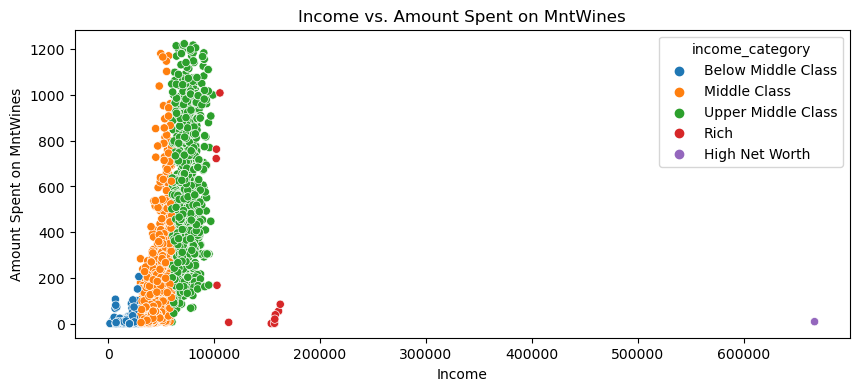

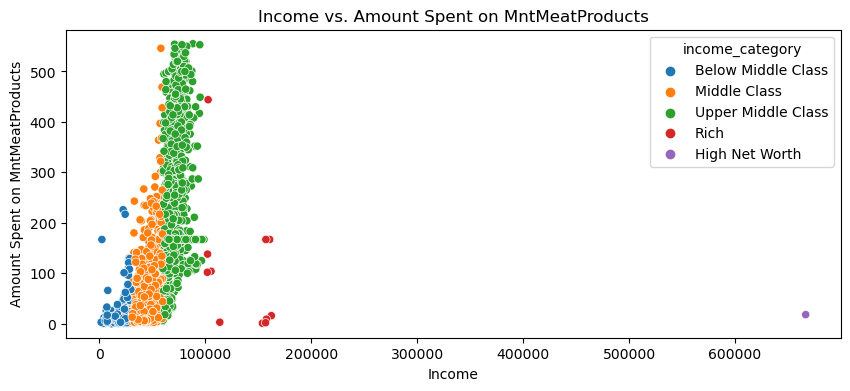

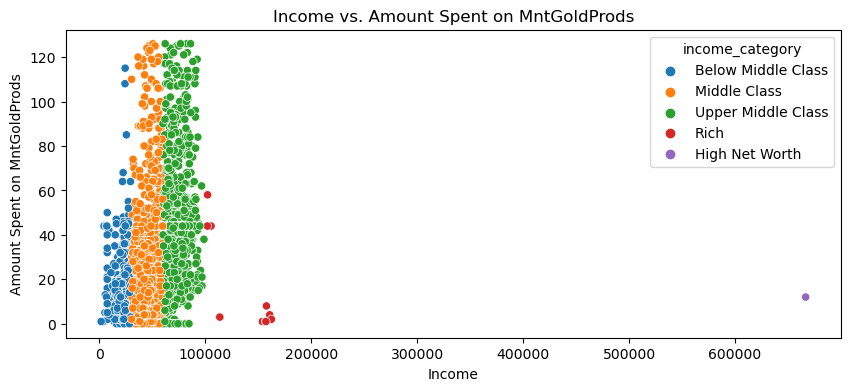

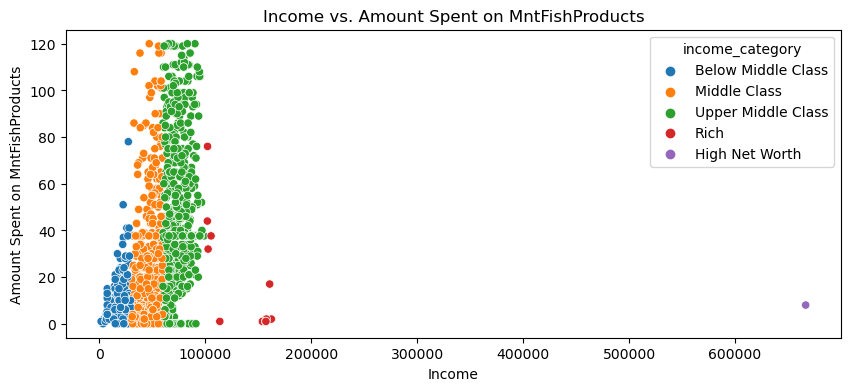

In [100]:
product_categories = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']

for category in product_categories:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=count, x='Income(in_$)',color='skyblue',marker='o',hue='income_category', y=category)
    plt.title(f'Income vs. Amount Spent on {category}')
    plt.xlabel('Income')
    plt.ylabel(f'Amount Spent on {category}')
    plt.show()

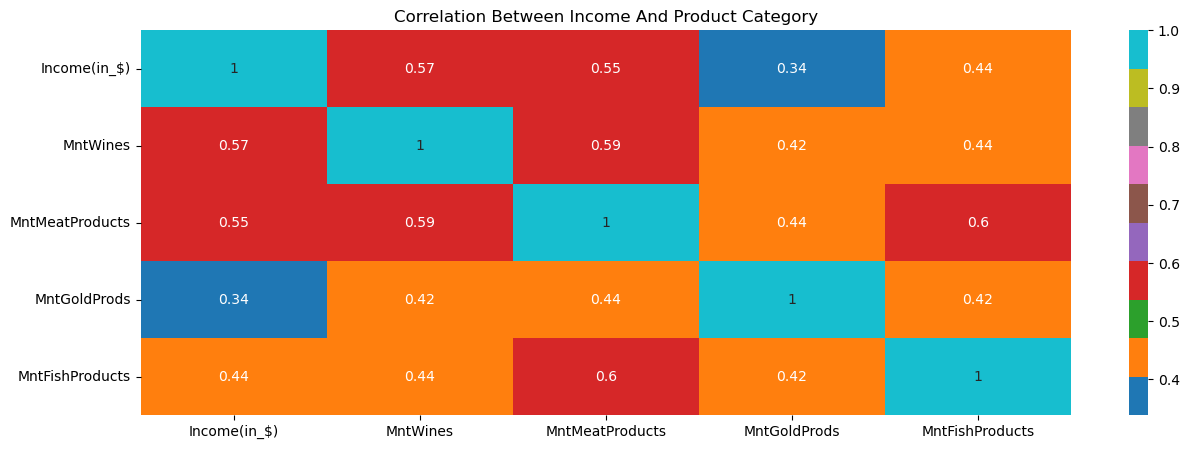

In [101]:
# Correlation Income And Product Category

correlation_matrix = count[['Income(in_$)'] + product_categories].corr()

plt.figure(figsize=(15,5))
sns.heatmap(correlation_matrix,cmap='tab10',annot=True)
plt.title('Correlation Between Income And Product Category')
plt.show()

#### Top     
- Correlation are between amount spent on meat Products and the amount spent on Fish products
- Correlation are between amount spent on Wines and the amount spent on Meat products       
- Correlation are between amount spent on Wines and the Income
#### Least  
- Correlation are between amount spent on Gold products and income

--------------------------------------------------------------------------------------------------------------------------------

## Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc

In [102]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
unique_customers = count['CustomerID'].nunique()
campaign_acceptance = {}

for campaign in campaigns:
    accepted_customers = count[count[campaign] == 1]['CustomerID'].nunique()
    campaign_acceptance[campaign] = accepted_customers

In [103]:
funnel_data = {}
for campaign, accepted_customers in campaign_acceptance.items():
    percentage = (accepted_customers / unique_customers) * 100
    funnel_data[campaign] = percentage

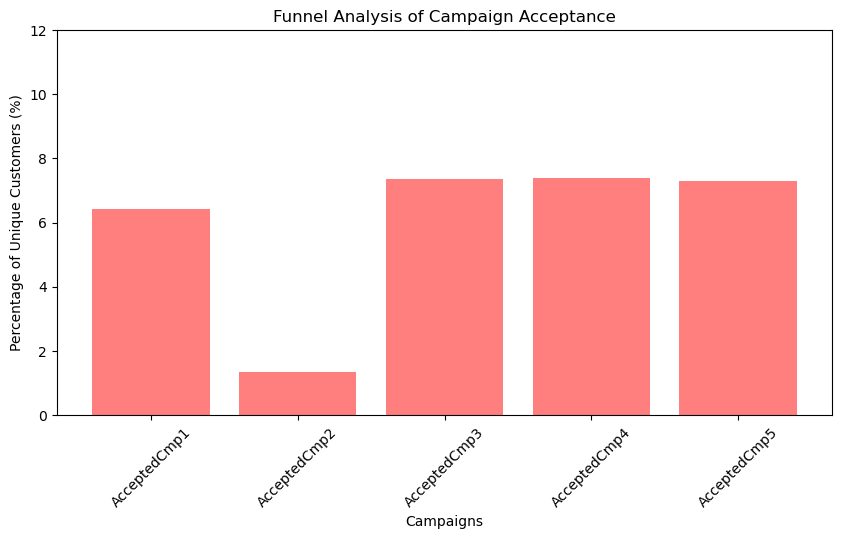

In [104]:
plt.figure(figsize=(10,5))
plt.bar(funnel_data.keys(), funnel_data.values(), color=(1, 0, 0, 0.5))
plt.title('Funnel Analysis of Campaign Acceptance')
plt.xlabel('Campaigns')
plt.ylabel('Percentage of Unique Customers (%)')
plt.ylim(0, 12)
plt.xticks(rotation=45)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

## Profile of people who respond vs. who don’t

In [105]:
current_year = pd.to_datetime('today').year
count['Age']=current_year - count['Year_Birth']

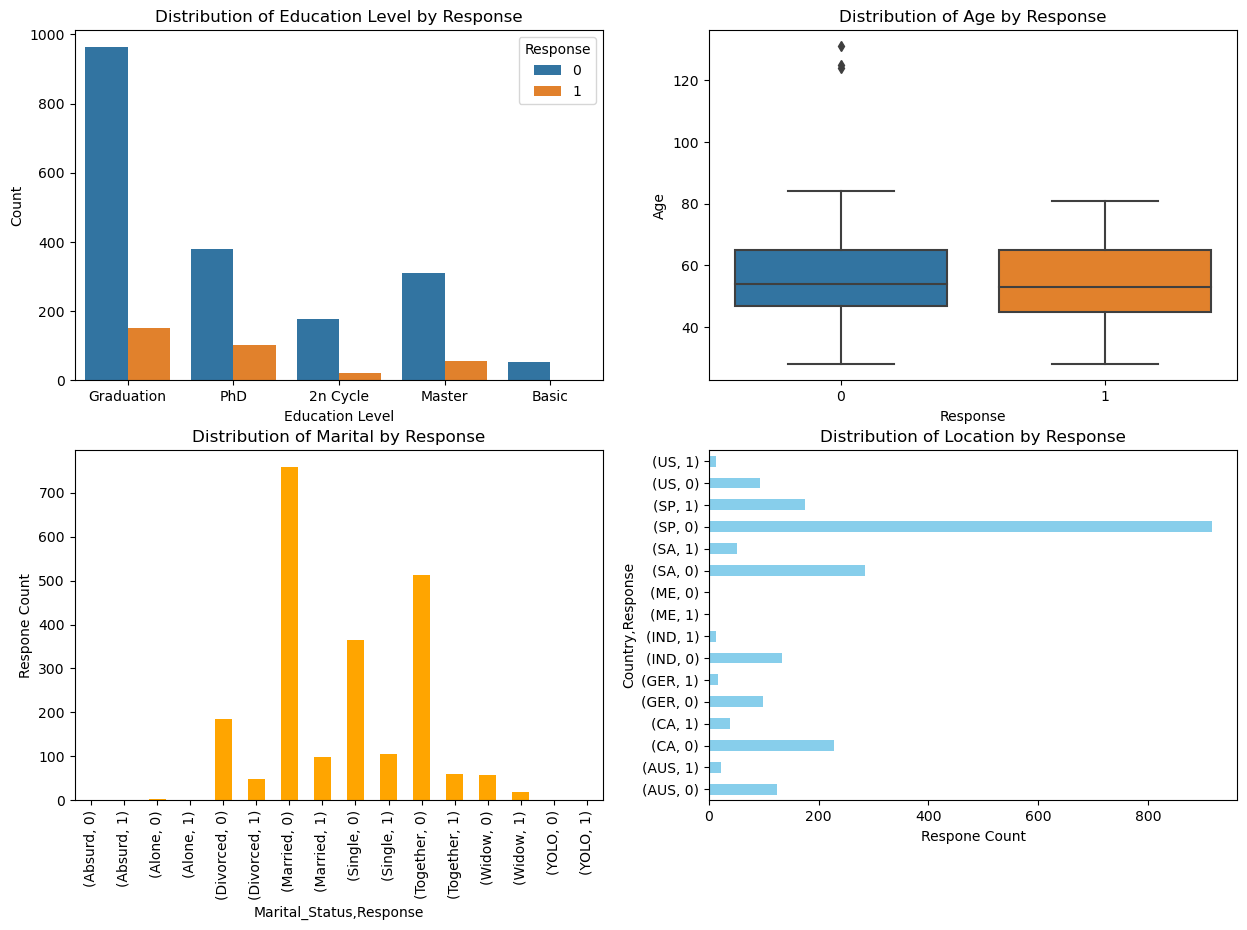

In [106]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data=w_data, x='Education', hue='Response')
plt.title('Distribution of Education Level by Response')
plt.xlabel('Education Level')
plt.ylabel('Count')


plt.subplot(2,2,2)
sns.boxplot(data=count, x='Response', y='Age')
plt.title('Distribution of Age by Response')
plt.xlabel('Response')
plt.ylabel('Age')

plt.subplot(2,2,3)
w_data.groupby('Marital_Status')["Response"].value_counts().plot(kind="bar",color="orange",title='Distribution of Marital by Response',ylabel='Respone Count')

plt.subplot(2,2,4)
w_data.groupby('Country')["Response"].value_counts().plot(kind="barh",color="skyblue",title='Distribution of Location by Response',xlabel='Respone Count')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------

## Can you test the hypothesis that recent customers complain less in general compared to older customers?


### H0 : Recent customers complain more in general compared to older customers 
### Ha :Recent customers complain less in general compared to older customers

In [107]:
#How many customers have complained

w_data['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

In [108]:
#Displaying the data

edit_data = pd.DataFrame(w_data)

edit_data['Customer_Inseption_Date'] = pd.to_datetime(edit_data['Customer_Inseption_Date'])

complaints_edit_data = edit_data[edit_data['Complain'] == 1]

print(complaints_edit_data[['CustomerID', 'Customer_Inseption_Date', 'Complain']])

      CustomerID Customer_Inseption_Date  Complain
205        10995              2012-11-12         1
295        10401              2013-09-04         1
353         5726              2014-03-20         1
550         9483              2013-08-19         1
656        10971              2012-09-03         1
722          255              2014-03-30         1
769          359              2013-01-13         1
936         3710              2012-10-12         1
992         6201              2013-11-29         1
1079        7966              2013-01-08         1
1094        3120              2013-08-28         1
1287        4427              2012-09-18         1
1324        7192              2013-04-15         1
1463        6142              2013-08-20         1
1494        9500              2013-01-25         1
1729       10637              2013-01-01         1
1848        6742              2013-01-13         1
2060        6730              2012-11-03         1
2061        9916              2

In [109]:
edit_data = pd.DataFrame(pd.date_range('2013-01-01', freq='1D', periods=6), columns=['Date'])

bins_dt = pd.date_range('2012-01-01', freq='3D', periods=6)
bins_str = bins_dt.astype(str).values

labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

edit_data['cat'] = pd.cut(edit_data['Date'], bins=bins_dt, labels=labels)

In [110]:
edit_data = {'CustomerID':[],'Complain':[],'Date':[]}
complain= pd.DataFrame(edit_data)
complain['Date'] = pd.to_datetime(complain['Date'])
cutoff_date = pd.to_datetime('2014-01-01')
complain['customer_type'] = complain['Date'].apply(lambda x: 'recent' if x >= cutoff_date else 'older')
recent_customers = complain[complain['customer_type'] == 'recent']
older_customers = complain[complain['customer_type'] == 'older']
statistic, p_value = ttest_ind(recent_customers['Complain'], older_customers['Complain'])

In [111]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Recent customers complain more in general compared to older customers.")
else:
    print("Fail to reject the null hypothesis: Recent customers complain less than older customers.")

Fail to reject the null hypothesis: Recent customers complain less than older customers.


#### Ha :Recent customers complain less in general compared to older customers

--------------------------------------------------------------------------------------------------------------------------------

## Do people who accept the offer in the first campaign also accept in any other campaign?

## H0: People who accept the offer in the first campaign may not accept in any other campaign 
## Ha: People who accept the offer in the first campaign also accept in any other campaign

In [112]:

campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
unique_customers = count['CustomerID'].nunique()
campaign_acceptance = {}

for campaign in campaigns:
    accepted_customers = count[count[campaign] == 1]['CustomerID'].nunique()
    campaign_acceptance[campaign] = accepted_customers

In [113]:
  funnel_data = {}
for campaign, accepted_customers in campaign_acceptance.items():
    percentage = (accepted_customers / unique_customers) * 100
    funnel_data[campaign] = percentage

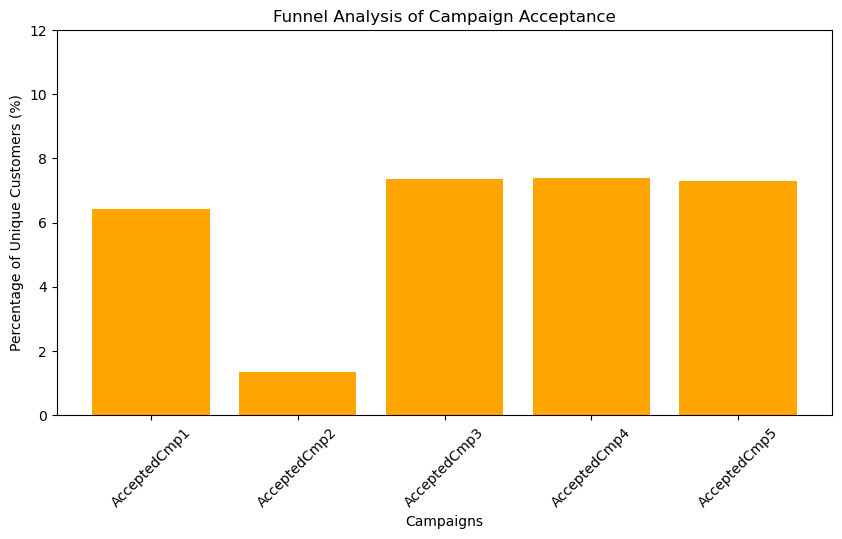

In [114]:
plt.figure(figsize=(10,5))
plt.bar(funnel_data.keys(), funnel_data.values(), color='orange')
plt.title('Funnel Analysis of Campaign Acceptance')
plt.xlabel('Campaigns')
plt.ylabel('Percentage of Unique Customers (%)')
plt.ylim(0, 12)
plt.xticks(rotation=45)
plt.show()

### It is evident from this funnel analysis that in comparison to Campaign 1, 
- Acceptance is lesser in Campaign 2, Higher in campaign 3, 4 & 5.
- Hence people who accept offer in 1st campaign also accept offer in campaigns 3, 4 & 5. 
- Company needs to work upon the ideas & goals for Campaign 2.